# POST PRUNING DT WITH COST COMPLEXITY PRUNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [5]:
data = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data.data,data.target,random_state = 0)

In [8]:
X_train.shape

(426, 30)

In [10]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.8811188811188811

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

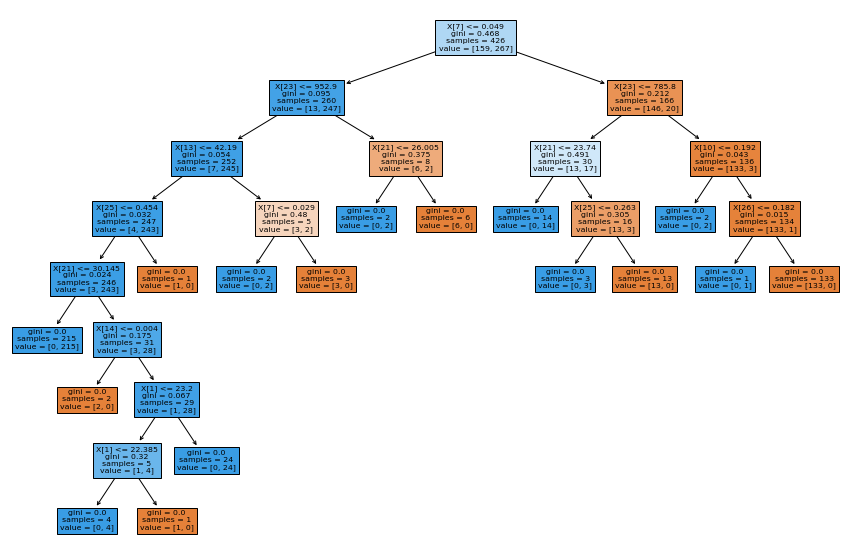

In [12]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [13]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

In [14]:
path.ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [38]:
models = []
for i in path.ccp_alphas:
    model = DecisionTreeClassifier(random_state = 0, ccp_alpha = i)
    model.fit(X_train,Y_train)
    models.append(model)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, path.ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [39]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

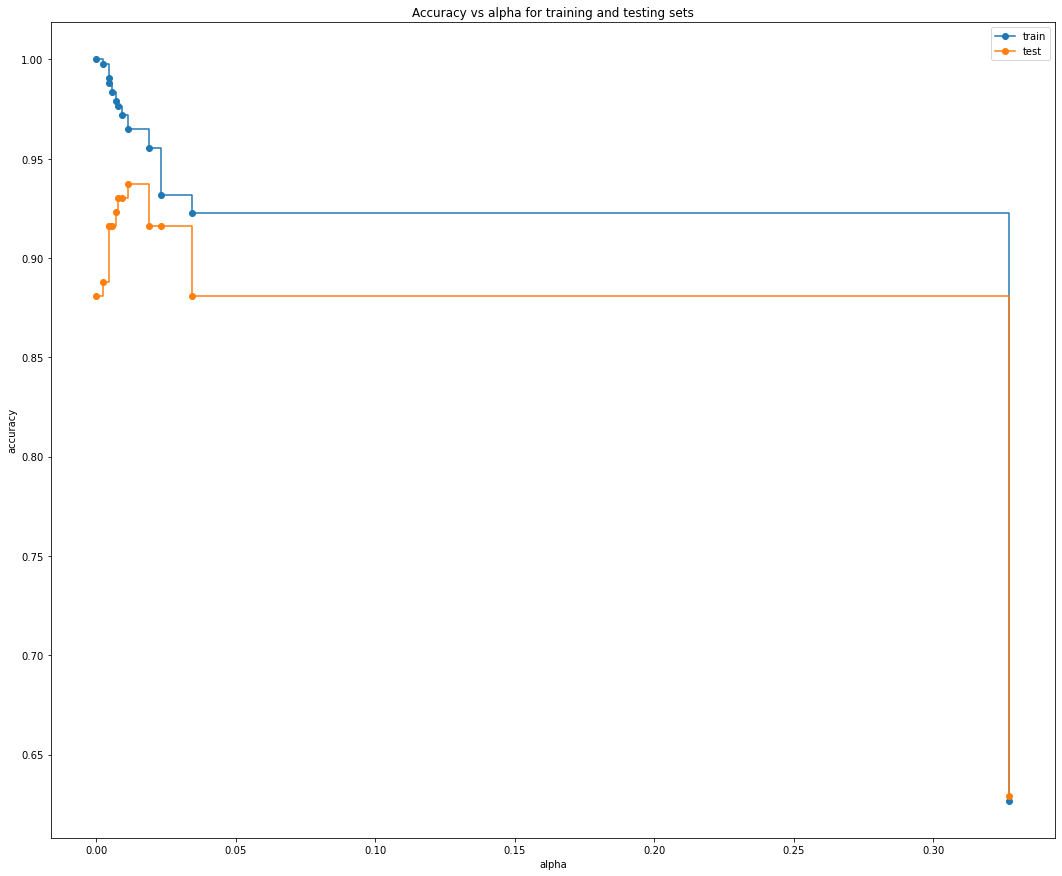

In [36]:
train_scores = [clf.score(X_train, Y_train) for clf in models]
test_scores = [clf.score(X_test, Y_test) for clf in models]

fig, ax = plt.subplots(figsize = (18,15))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(path.ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(path.ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
model = DecisionTreeClassifier(random_state=0,ccp_alpha = 0.012)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

In [34]:
accuracy_score(Y_test, y_pred)

0.9370629370629371

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

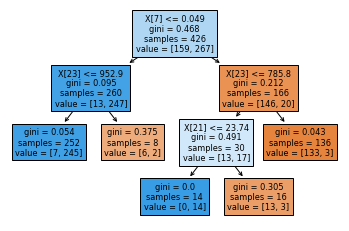

In [37]:
tree.plot_tree(model,filled=True)